In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
sentences = ['We love machine learning']

In [3]:
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(sentences)

In [4]:
tokenizer.word_index

{'we': 1, 'love': 2, 'machine': 3, 'learning': 4}

In [6]:
sentences = ['We love machine learning and deep learning learning deep']
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'learning': 1, 'deep': 2, 'we': 3, 'love': 4, 'machine': 5, 'and': 6}

In [7]:
sentences = ['We love, machine Learning, and Deep learning! learning? deep']
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'learning': 1, 'deep': 2, 'we': 3, 'love': 4, 'machine': 5, 'and': 6}

In [9]:
sentences = ['We love, machine Learning',
            'We are learning tokenization',
            'next we will learn sequencing']
tokenizer = Tokenizer(num_words = 50)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'we': 1,
 'learning': 2,
 'love': 3,
 'machine': 4,
 'are': 5,
 'tokenization': 6,
 'next': 7,
 'will': 8,
 'learn': 9,
 'sequencing': 10}

In [10]:
sentences = ['We love, machine Learning',
            'We are learning tokenization',
            'next we will learn sequencing']
tokenizer = Tokenizer(num_words = 50)
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)

In [11]:
sequences

[[1, 3, 4, 2], [1, 5, 2, 6], [7, 1, 8, 9, 10]]

In [12]:
tokenizer.word_index

{'we': 1,
 'learning': 2,
 'love': 3,
 'machine': 4,
 'are': 5,
 'tokenization': 6,
 'next': 7,
 'will': 8,
 'learn': 9,
 'sequencing': 10}

In [13]:
sequence = tokenizer.texts_to_sequences(['We are learning sequencing'])
sequence

[[1, 5, 2, 10]]

In [15]:
sequence = tokenizer.texts_to_sequences(['We can learn sequencing'])
sequence

[[1, 9, 10]]

In [20]:
sentences = ['We love, machine Learning',
            'We are learning tokenization',
            'next we will learn sequencing']
tokenizer = Tokenizer(num_words = 50, oov_token = '#OOV')
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)

In [21]:
tokenizer.word_index

{'#OOV': 1,
 'we': 2,
 'learning': 3,
 'love': 4,
 'machine': 5,
 'are': 6,
 'tokenization': 7,
 'next': 8,
 'will': 9,
 'learn': 10,
 'sequencing': 11}

In [22]:
sequence = tokenizer.texts_to_sequences(['We are learning sequencing'])
sequence

[[2, 6, 3, 11]]

In [23]:
sequence = tokenizer.texts_to_sequences(['We are learning trying to sequencing'])
sequence

[[2, 6, 3, 1, 1, 11]]

In [24]:
sentences = ['We love, machine Learning',
            'We are learning tokenization',
            'next we will learn sequencing',
            'we are fortunate to learn from the best trainer',
            'Machine learning and deep learning are fun']
tokenizer = Tokenizer(num_words = 100, oov_token = '#OOV')
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)

In [25]:
print(tokenizer.word_index)

{'#OOV': 1, 'we': 2, 'learning': 3, 'are': 4, 'machine': 5, 'learn': 6, 'love': 7, 'tokenization': 8, 'next': 9, 'will': 10, 'sequencing': 11, 'fortunate': 12, 'to': 13, 'from': 14, 'the': 15, 'best': 16, 'trainer': 17, 'and': 18, 'deep': 19, 'fun': 20}


In [26]:
sequences

[[2, 7, 5, 3],
 [2, 4, 3, 8],
 [9, 2, 10, 6, 11],
 [2, 4, 12, 13, 6, 14, 15, 16, 17],
 [5, 3, 18, 19, 3, 4, 20]]

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_seq = pad_sequences(sequences, padding = 'post')
padded_seq

array([[ 2,  7,  5,  3,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  8,  0,  0,  0,  0,  0],
       [ 9,  2, 10,  6, 11,  0,  0,  0,  0],
       [ 2,  4, 12, 13,  6, 14, 15, 16, 17],
       [ 5,  3, 18, 19,  3,  4, 20,  0,  0]])

In [32]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\Utkarsh\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [38]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [39]:
for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

In [40]:
for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

In [41]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [43]:
count =1
for s,l in train_data:
    if count > 3: break
    print(s,l, sep = '\n', end = '\n\n\n')
    count+=1

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on

In [48]:
count =1
for s in training_sentences:
    if count > 5: break
    print(s, end = '\n\n\n')
    count+=1

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [50]:
count =1
for l in training_labels:
    if count > 5: break
    print(l, end = '  ')
    count+=1

0  0  0  1  1  

In [51]:
print(len(training_sentences))
print(len(training_labels))
print(len(testing_sentences))
print(len(testing_labels))

25000
25000
25000
25000


In [54]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_token = '#OOV'

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating=trunc_type)

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(
    padded,
    training_labels,
    epochs = 5,
    validation_data = (testing_padded, testing_labels)
)

Epoch 1/5
782/782 [==============================] - 55s 63ms/step - loss: 0.5639 - accuracy: 0.6733 - val_loss: 0.4085 - val_accuracy: 0.8132
Epoch 2/5
782/782 [==============================] - 49s 62ms/step - loss: 0.2772 - accuracy: 0.8906 - val_loss: 0.5116 - val_accuracy: 0.7749
Epoch 3/5
782/782 [==============================] - 48s 61ms/step - loss: 0.2098 - accuracy: 0.9243 - val_loss: 0.4297 - val_accuracy: 0.8157
Epoch 4/5
782/782 [==============================] - 52s 66ms/step - loss: 0.1653 - accuracy: 0.9418 - val_loss: 0.4886 - val_accuracy: 0.8052
Epoch 5/5
782/782 [==============================] - 51s 65ms/step - loss: 0.1161 - accuracy: 0.9621 - val_loss: 0.5737 - val_accuracy: 0.8088


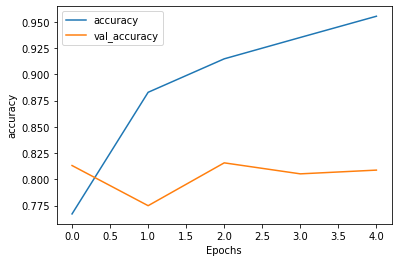

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

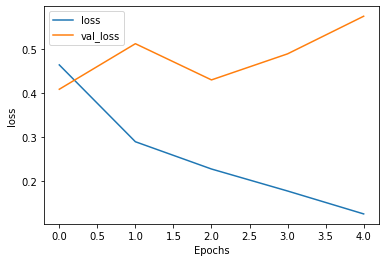

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()